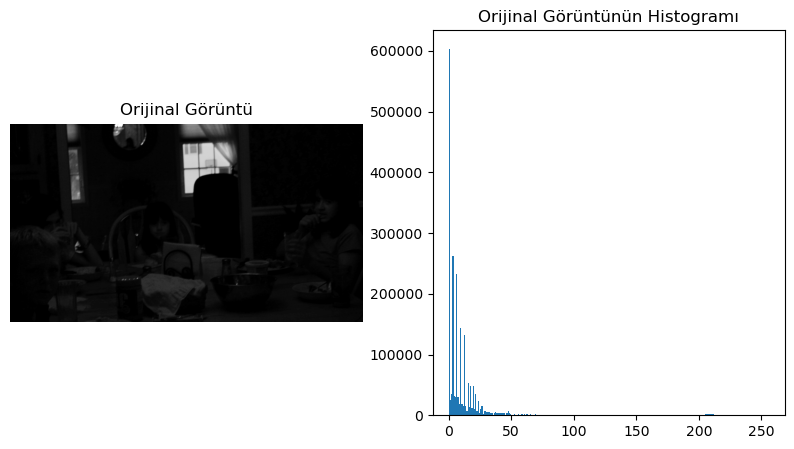

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Görüntüyü yükleme
image_path = 'goruntu3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Histogramı çizdirme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Orijinal Görüntünün Histogramı')
plt.show()


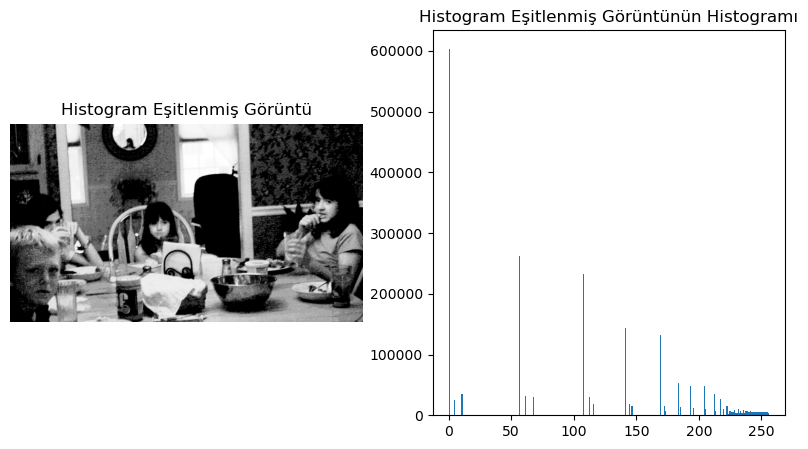

In [4]:
equalized_image = cv2.equalizeHist(image)

# Eşitlenmiş görüntüyü ve histogramını çizdirme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Eşitlenmiş Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Histogram Eşitlenmiş Görüntünün Histogramı')
plt.show()


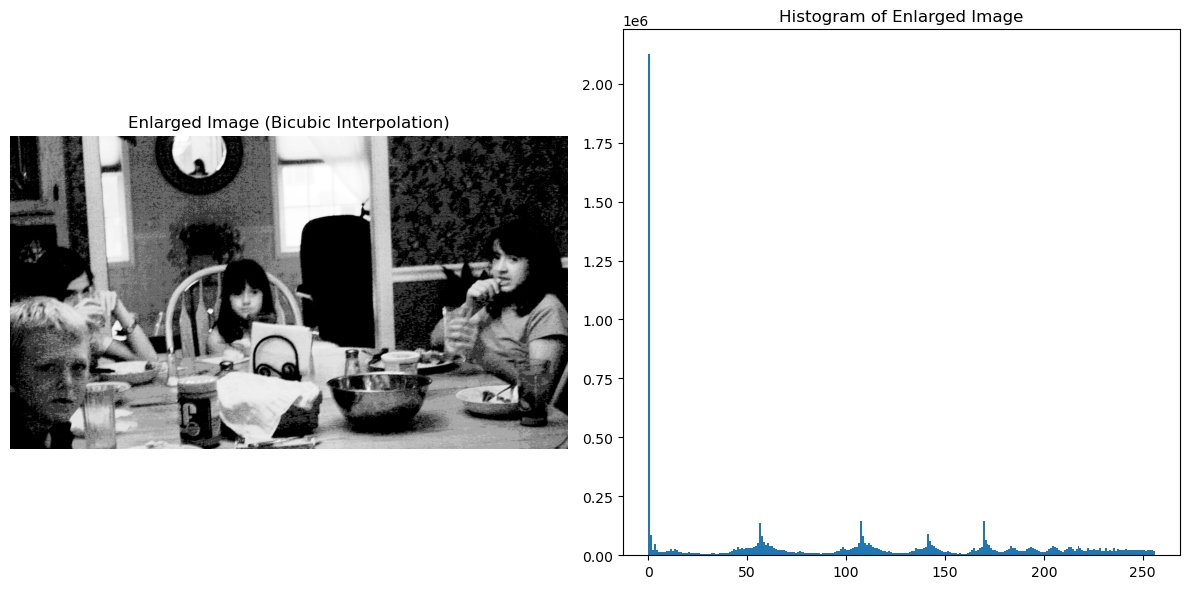

In [5]:
# Görüntüyü bicubic interpolasyon ile iki kat büyütme
height, width = equalized_image.shape
enlarged_image = cv2.resize(equalized_image, (2 * width, 2 * height), interpolation=cv2.INTER_CUBIC)

# Büyütülmüş görüntüyü ve histogramını çizdirme
plt.figure(figsize=(12, 6))

# Büyütülmüş görüntüyü çizdirme
plt.subplot(1, 2, 1)
plt.imshow(enlarged_image, cmap='gray')
plt.title('Enlarged Image (Bicubic Interpolation)')
plt.axis('off')

# Büyütülmüş görüntünün histogramını çizdirme
plt.subplot(1, 2, 2)
plt.hist(enlarged_image.ravel(), 256, [0, 256])
plt.title('Histogram of Enlarged Image')

plt.tight_layout()
plt.show()


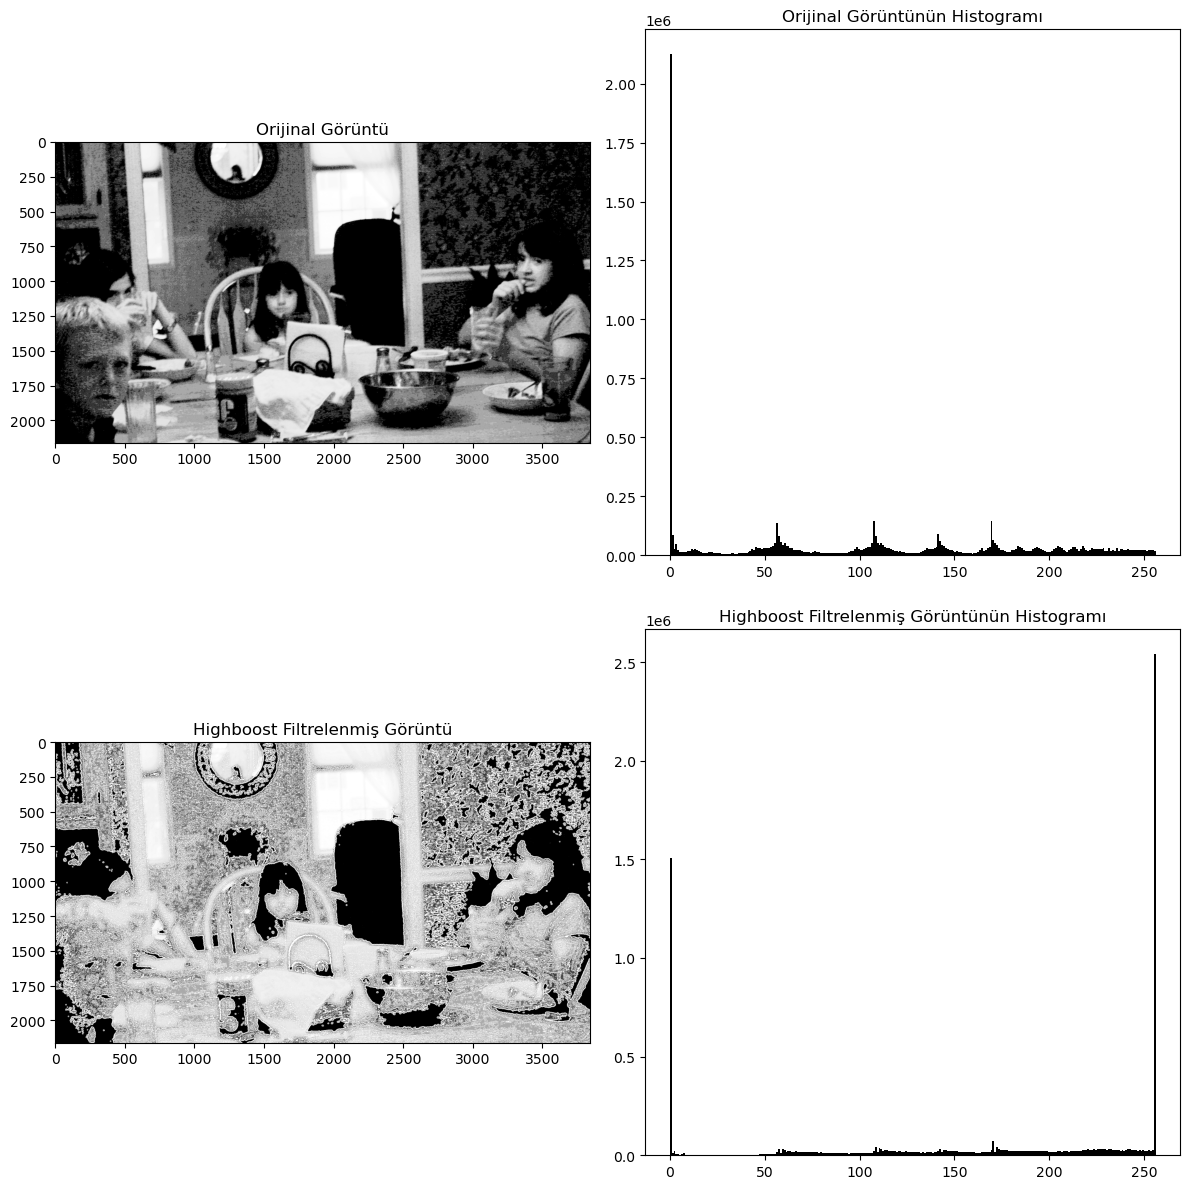

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy import fftpack

original_array = np.array(enlarged_image)

# Unsharp masking ve highboost filtering uygulama
# Gaussian blur uygulama
blurred_image = gaussian_filter(original_array, sigma=3)

# Unsharp masking: orijinal görüntüden bulanık görüntüyü çıkarma
unsharp_mask = original_array - blurred_image

# Highboost filtering: orijinal görüntüye unsharp mask ekleyerek detayları vurgulama
# A değeri highboost faktörünü belirler (A > 1)
A = 1.5
highboost_image = original_array + A * unsharp_mask
highboost_image = np.clip(highboost_image, 0, 255)  # Piksel değerlerini 0-255 aralığında sınırlandırma

# Görüntü ve histogramını çizdirme
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Orijinal görüntü ve histogramı
axs[0, 0].imshow(original_array, cmap='gray')
axs[0, 0].set_title("Orijinal Görüntü")
axs[0, 1].hist(original_array.ravel(), bins=256, range=[0,256], color='black')
axs[0, 1].set_title("Orijinal Görüntünün Histogramı")

# Highboost filtrelenmiş görüntü ve histogramı
axs[1, 0].imshow(highboost_image, cmap='gray')
axs[1, 0].set_title("Highboost Filtrelenmiş Görüntü")
axs[1, 1].hist(highboost_image.ravel(), bins=256, range=[0,256], color='black')
axs[1, 1].set_title("Highboost Filtrelenmiş Görüntünün Histogramı")

plt.tight_layout()
plt.show()


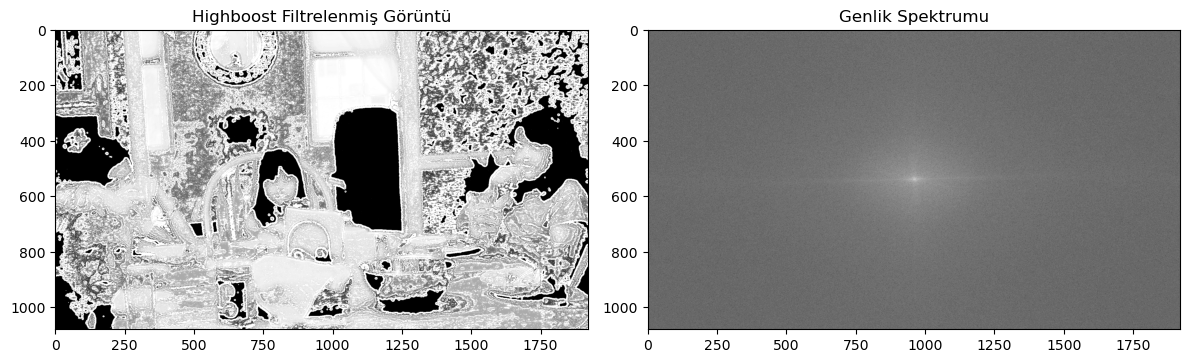

In [5]:
# Highboost filtrelenmiş görüntünün 2D Fourier Dönüşümünü alma
dft = fftpack.fft2(highboost_image)
dft_shifted = fftpack.fftshift(dft)

# Genlik spektrumunu hesaplama
magnitude_spectrum = np.abs(dft_shifted)

# Görüntü ve genlik spektrumunu çizdirme
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Highboost filtrelenmiş görüntü
axs[0].imshow(highboost_image, cmap='gray')
axs[0].set_title("Highboost Filtrelenmiş Görüntü")

# Genlik spektrumu
axs[1].imshow(np.log1p(magnitude_spectrum), cmap='gray')  # Logaritmik dönüşüm genlik spektrumunu daha iyi gösterir
axs[1].set_title("Genlik Spektrumu")

plt.tight_layout()
plt.show()


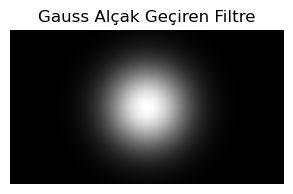

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2
from scipy.ndimage import gaussian_filter

original_array = np.array(highboost_image)

# Eğer görüntü RGB ise, gri tonlamaya dönüştür
if original_array.ndim == 3:
    original_array = original_array.mean(axis=2)

# Fourier dönüşümü
fft_image = fftshift(fft2(original_array))

# Gauss alçak geçiren filtre oluşturma
radius = 200  # Yarı çap
rows, cols = original_array.shape
crow, ccol = rows // 2 , cols // 2  # Merkez noktası

# Yarı çapı 200 olan bir Gauss filtresi oluşturma
x, y = np.ogrid[:rows, :cols]
mask = np.exp(-((x - crow)**2 + (y - ccol)**2) / (2. * radius**2))

# Filtreyi Fourier dönüşümüne uygulama
fft_filtered = fft_image * mask

# Filtrelenmiş görüntüyü geri almak için ters Fourier dönüşümü
filtered_image = np.abs(ifft2(ifftshift(fft_filtered)))

# Filtre ve filtrelenmiş görüntünün çizdirilmesi
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Gauss Alçak Geçiren Filtre')
plt.axis('off')


plt.show()
